In [15]:
import pandas as pd
from glob import glob
from PIL import Image
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
import sys

In [ ]:
print("Platform:", sys.platform)


Platform: win32


In [2]:
PATH = 'C:/Users/Reinhard/Documents/computer_vision_projects/root_volume_estimation_challenge'

In [3]:
train = pd.read_csv(PATH + '/Train.csv')

In [4]:
train.head()

ID  FolderName  PlantNumber Side  Start  End  RootVolume  \
0  ID_826322_Lbmaya  A6dzrkjqvl            3    L     33   42         0.9   
1  ID_718181_Bslpwx  Ypktwvqjbn            7    L     33   41         1.5   
2  ID_465762_L1n61d  Ox18ob0syv            4    R     21   28         2.7   
3  ID_626872_Pbmx2e  Hqcekwpxgu            2    R     30   39         2.6   
4  ID_518846_Opko8c  Ummqfuetoc            1    R     17   26         2.7   

             Genotype  Stage  
0  IITA-TMS-IBA000070  Early  
1           IBA154810  Early  
2           IBA980581  Early  
3  IITA-TMS-IBA000070  Early  
4           IBA980581  Early

In [5]:
imgs = glob(f'{PATH}/data/train/*/*')
Image.open(imgs[7])

## Defining the helper functions for images and masks visualization

In [ ]:
def get_images_labels(path, folder_name):
    labels = glob(f'{path}/train_labels/train_labels/{folder_name}*')
    labels = sorted(labels)
    imgs = glob(f'{path}/data/train/{folder_name.split("_")[0]}/{folder_name}*')
    imgs = sorted(imgs)
    return labels, imgs

def generate_random_color():
    """Generate a bright, random color."""
    return tuple(random.randint(100, 255) for _ in range(3))  # RGB values

def parse_label_file(label_path, img_width, img_height):
    """Parse label file and extract polygon coordinates, converting from normalized to pixel values."""
    polygons = []
    with open(label_path, 'r') as file:
        for line in file:
            values = line.strip().split()
            if len(values) < 3:  # Skip empty or incorrect lines
                continue
            coords = [float(v) for v in values[1:]]  # Ignore the class_id
            polygon = np.array([(int(x * img_width), int(y * img_height)) for x, y in zip(coords[0::2], coords[1::2])], dtype=np.int32)
            polygons.append(polygon)
    return polygons


In [11]:
def draw_masks(image_path, label_path):
    """Draws polygon masks with unique colors per instance on the image."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    img_height, img_width, _ = image.shape
    polygons = parse_label_file(label_path, img_width, img_height)
    
    for polygon in polygons:
        color = generate_random_color()  # Unique color for each instance
        cv2.polylines(image, [polygon], isClosed=True, color=color, thickness=2)
        #cv2.fillPoly(image, [polygon], color=color + (50,))  # Transparent fill
    
    return image

def resize_image(image, width):
    """Resize image while maintaining aspect ratio."""
    h, w, _ = image.shape
    print(h,w)
    scale = width / w
    new_h = int(h * scale)
    resized_image = cv2.resize(image, (width, new_h), interpolation=cv2.INTER_AREA)
    return resized_image

In [12]:
def process_and_display(label_files, image_files):
    """Find matching files, draw masks, resize images, stack vertically, and display."""
    matching_images = []
    
    # Create a mapping for fast lookup
    label_map = {os.path.splitext(os.path.basename(lf))[0]: lf for lf in label_files}
    img_names = []
    min_width = float('inf')
    
    for image_path in image_files:
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        if image_name in label_map:
            img_names.append(image_name)
            processed_image = draw_masks(image_path, label_map[image_name])
            min_width = min(min_width, processed_image.shape[1])
            matching_images.append(processed_image)
    
    if not matching_images:
        #print("No matching images found.")
        return None, None
    
    # Ensure images have the same width by truncating from the right
    matching_images = [img[:, :min_width, :] for img in matching_images]
    
    # Stack images vertically
    final_image = np.vstack(matching_images)
    
    # Display
    plt.figure(figsize=(10, len(matching_images) * 3))
    plt.imshow(final_image)
    plt.axis('off')
    plt.show()
    
    return final_image, img_names

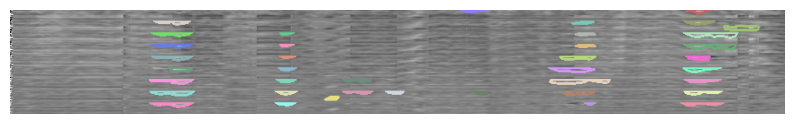

Kjvcz6bjfj_L_ ['024', '026', '027', '028', '029', '031', '033', '034', '036']


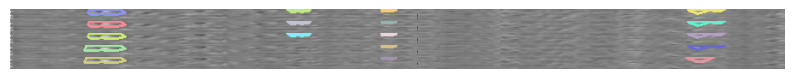

Kjvcz6bjfj_R_ ['034', '035', '036', '037', '038']


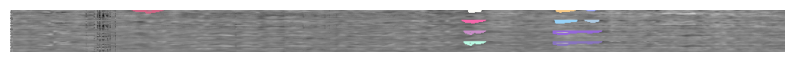

Ntqusw7xpb_L_ ['024', '026', '030', '031']


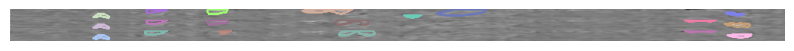

Ntqusw7xpb_R_ ['038', '039', '042']


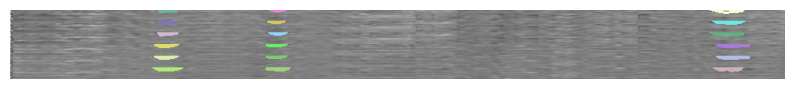

Ph2ti2sjzu_L_ ['027', '028', '029', '032', '034', '035']


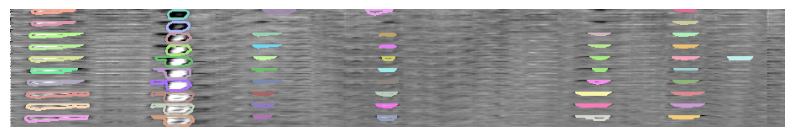

Idiolerx47_L_ ['010', '011', '013', '014', '015', '016', '017', '019', '020', '021']


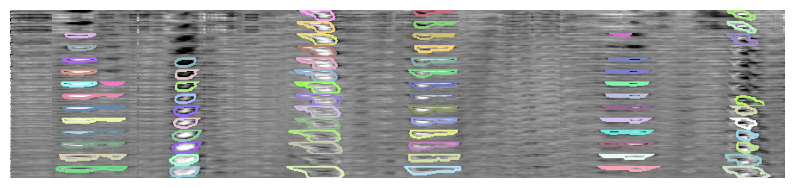

Idiolerx47_R_ ['008', '009', '011', '012', '013', '014', '015', '016', '017', '018', '019', '021', '023', '024']


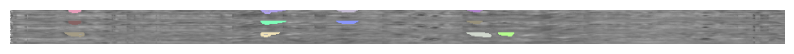

Pw4ytibfql_L_ ['026', '027', '030']


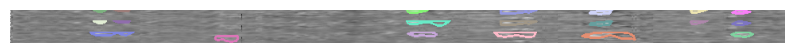

Pw4ytibfql_R_ ['030', '031', '035']


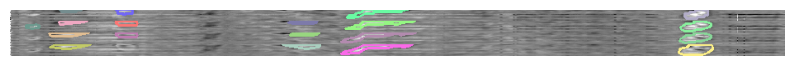

Gernxgxbnu_L_ ['014', '016', '018', '019']


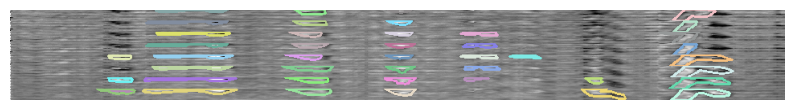

Gernxgxbnu_R_ ['012', '013', '014', '015', '016', '017', '019', '020']


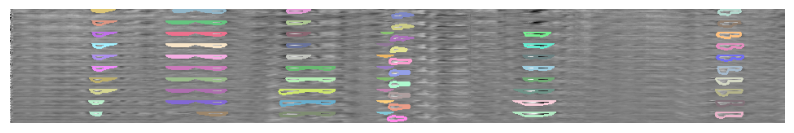

Xrrcqvdbkw_R_ ['027', '028', '029', '030', '031', '032', '033', '034', '035', '036']


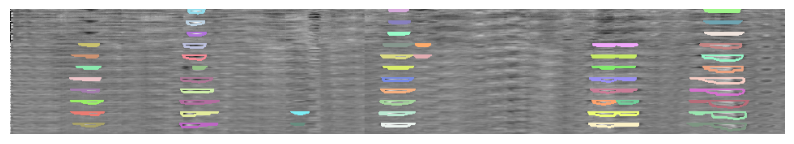

Zplb9xaxis_L_ ['010', '011', '012', '019', '020', '021', '022', '023', '024', '025', '026']


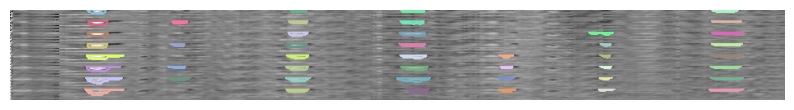

Zplb9xaxis_R_ ['014', '015', '016', '017', '018', '019', '020', '021']


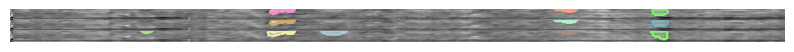

Xdi1ipcemf_L_ ['023', '024', '025']


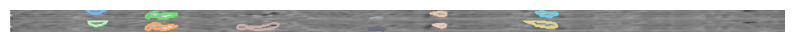

Xdi1ipcemf_R_ ['036', '037']


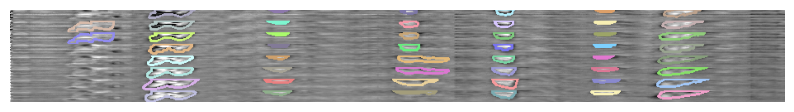

F3odypnsyf_L_ ['015', '016', '017', '018', '020', '021', '022', '023']


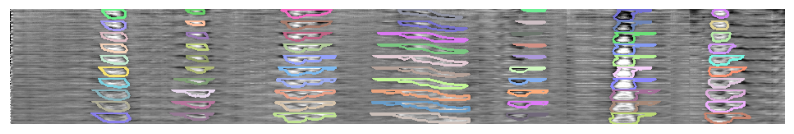

F3odypnsyf_R_ ['010', '011', '012', '013', '014', '015', '016', '018', '019', '020']


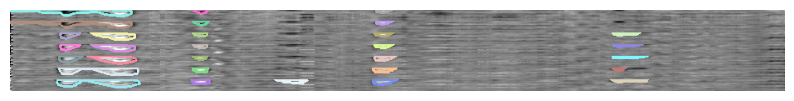

Isdzz86frg_L_ ['010', '011', '012', '013', '014', '016', '017']


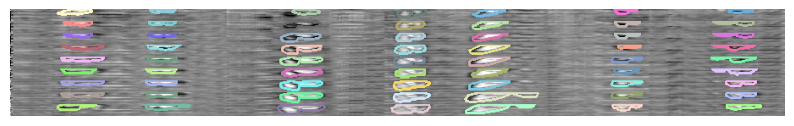

Isdzz86frg_R_ ['010', '011', '012', '013', '014', '015', '016', '017', '018']


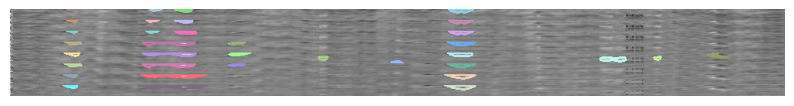

Tbhppxjkvr_L_ ['024', '025', '026', '027', '028', '029', '030', '031']


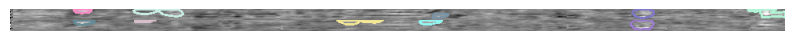

Tbhppxjkvr_R_ ['018', '021']


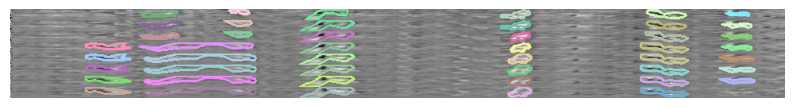

Miny0c252a_R_ ['028', '029', '030', '031', '032', '033', '034', '035']


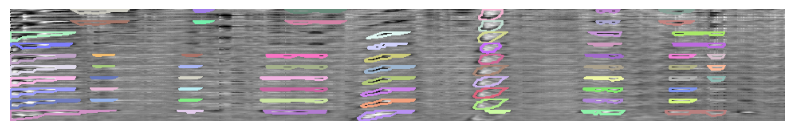

Aevcaxguiw_L_ ['008', '009', '010', '011', '012', '013', '014', '015', '016', '022']


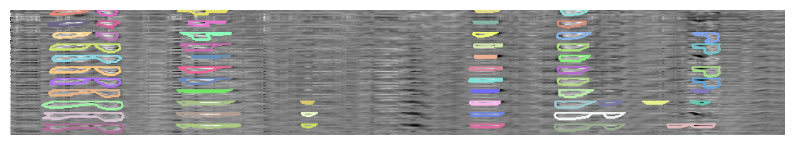

Aevcaxguiw_R_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020']


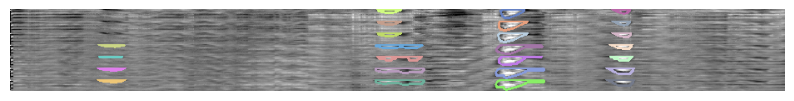

Td901zykbu_L_ ['008', '009', '010', '011', '012', '013', '014']


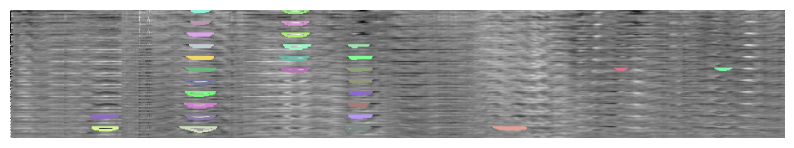

Td901zykbu_R_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020']


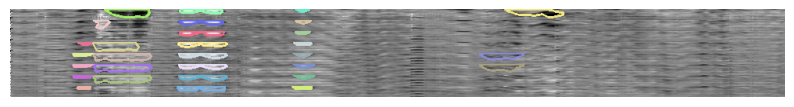

Ynjc34lyjb_L_ ['010', '011', '012', '013', '014', '015', '016', '017']


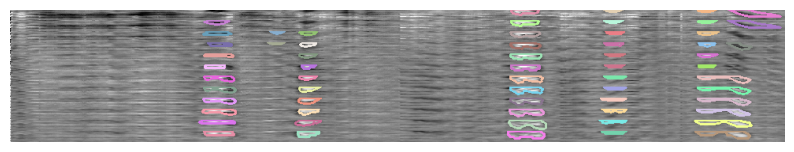

Ynjc34lyjb_R_ ['008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019']


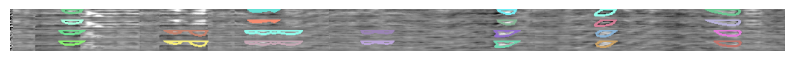

Efaiye0hmy_R_ ['021', '022', '025', '026']


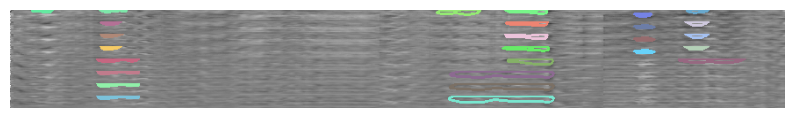

M4stkh3qez_R_ ['026', '027', '028', '029', '031', '032', '033', '034']


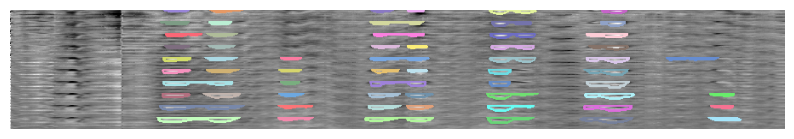

J0zdanvgrq_L_ ['010', '011', '012', '013', '015', '016', '017', '018', '019', '020']


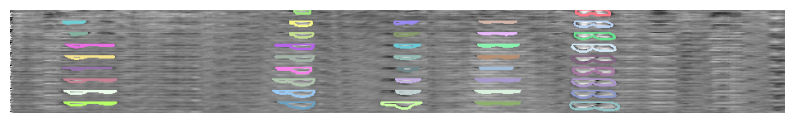

J0zdanvgrq_R_ ['010', '011', '013', '014', '015', '016', '017', '018', '019']


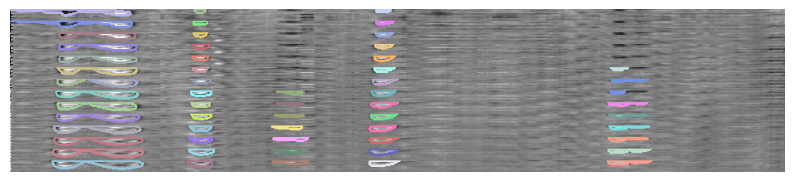

A2miww5mfx_L_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023']


A2miww5mfx_R_ ['013']


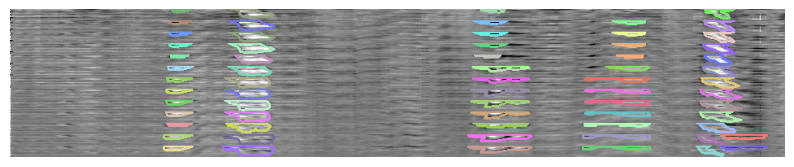

Gawaekzxou_L_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022']


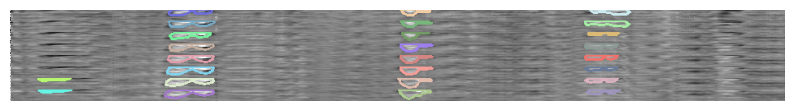

Gawaekzxou_R_ ['010', '011', '012', '013', '014', '015', '016', '017']


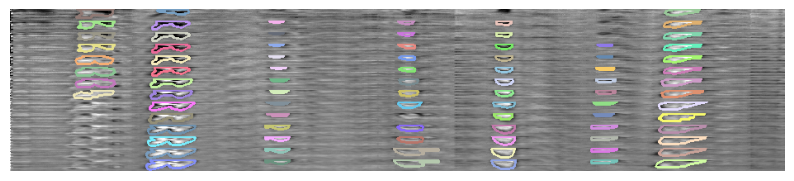

Cvdxhjziab_L_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023']


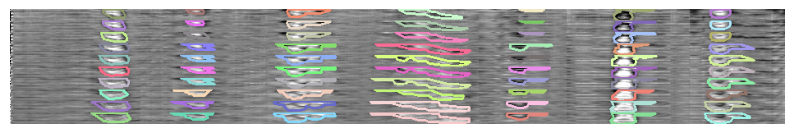

Cvdxhjziab_R_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019']


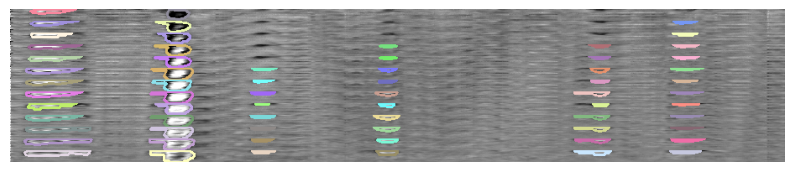

Nto14cbfiw_L_ ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '023']


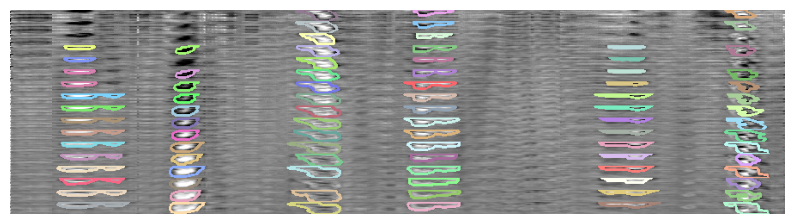

Nto14cbfiw_R_ ['008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024']


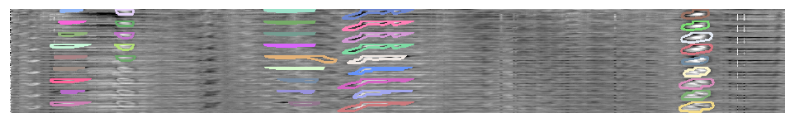

Iuxzotmvrc_L_ ['010', '011', '012', '013', '014', '015', '016', '017', '018']


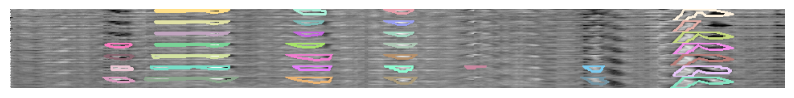

Iuxzotmvrc_R_ ['013', '014', '015', '016', '017', '018', '019']


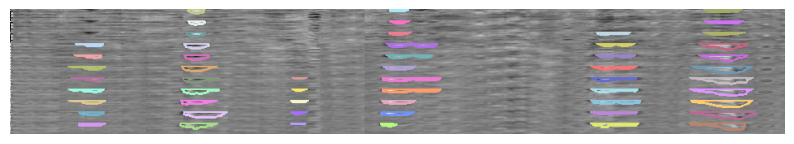

Jct834ckgh_L_ ['010', '011', '012', '019', '020', '022', '023', '024', '025', '026', '027']


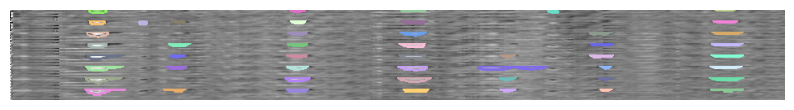

Jct834ckgh_R_ ['012', '013', '015', '016', '017', '018', '019', '020']


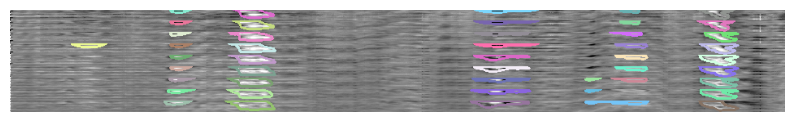

Ehwtko5bvb_L_ ['010', '011', '012', '013', '015', '016', '017', '018', '019']


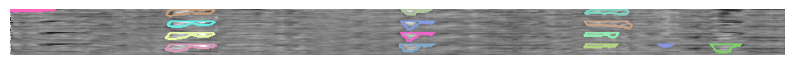

Ehwtko5bvb_R_ ['010', '011', '013', '014']


In [13]:
num_groups = 0
num_imgs = 0
for f in train.FolderName.unique():
    for side in ['L','R']:
        labels, imgs = get_images_labels(PATH, f'{f}_{side}_')
        img, names = process_and_display(labels, imgs)
        if img is not None:
            print(f'{f}_{side}_', [i.split('_')[-1] for i in names])
            num_groups+=1
            num_imgs += len(names)
            img_names = names


In [ ]:
class CassavaDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels 
        self.transform = transform
        self.image_filenames = os.listdir(image_dir)   

    def __len__(self):
        return len(self.image_filenames)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']

        return image, torch.tensor(label, dtype=torch.float32)
    
# Dtat transformations
train_transform = A.Compose([
    A.Resize(256,256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2()
])

val_transforms = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

#Training Loop
def train_model(model, train_loader, val_loader, epochs=50, lr =0.0001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.0001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)
    best_loss = float('inf')

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        print(f"Epoch {epoch+1}, Train Loss: {train_loss}")
        scheduler.step(train_loss) 
    return

100%|██████████| 386/386 [00:03<00:00, 117.24it/s]


Validation RMSE: 1.3679645003081706


100%|██████████| 130/130 [00:00<00:00, 172.41it/s]


In [ ]:
def display_sample_images(dir_path, sample=5):
    dir_path = Path(dir_path) if isinstance(dir_path, str) else dir_path

    image_list = []
    # Sort the images to ensure they are processed in order
    images = sorted(dir_path.glob("*.jpg"))
    if not images:
        return None

    # Iterate over the first 'sample' images
    for img_path in images[:sample]:
        img = read_image(str(img_path))
        resize_transform = transforms.Resize((240, 240))
        img = resize_transform(img)
        image_list.append(img)

    # Organize the grid to have 'sample' images per row
    Grid = make_grid(image_list, nrow=5)
    # Convert the tensor grid to a PIL Image for display
    img = torchvision.transforms.ToPILImage()(Grid)
    return img

(130, 2)